<a href="https://colab.research.google.com/github/shahinesmaeil/text-data-set-and-power-usage-prediction/blob/main/Data_Science_Assignment_Text_Data_and_Predict_Power_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Text data set 
## Predict the class of Edgar Allan Poe ‘s poems.

## Step 01:Import Libraries

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
print()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



In [ ]:
import string
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

## 1.Preliminary descriptive statistics

In [ ]:
import pandas as pd
df = pd.read_csv('EhB Data Science Assignment Dataset 1.csv') # storing csv file into the dataframe


In [ ]:
df.head(10) # Showing the first five instances of corpus(A corpus can be defined as a collection of text documents. It can be thought as just a bunch of text files in a directory, often alongside many other directories of text files)

title  ... normalized_date
0             A DESCENT INTO THE MAELSTRÖM  ...        May 1841
1                            A PREDICAMENT  ...   November 1838
2                      A TALE OF JERUSALEM  ...       June 1832
3           A TALE OF THE RAGGED MOUNTAINS  ...      April 1844
4                                 BERENICE  ...      March 1835
5                                 DIDDLING  ...    October 1843
6                                 ELEONORA  ...          ? 1841
7  FOUR BEASTS IN ONE—THE HOMO-CAMELEOPARD  ...      March 1836
8                                 HOP-FROG  ...      March 1849
9         HOW TO WRITE A BLACKWOOD ARTICLE  ...   November 1838

[10 rows x 8 columns]

In [ ]:
df.tail(10)

title  ... normalized_date
60  WHY THE LITTLE FRENCHMAN WEARS HIS HAND IN A S...  ...     August 1839
61                                     WILLIAM WILSON  ...    October 1839
62                          * PHILOSOPHY OF FURNITURE  ...        May 1840
63                             MAELZEL’S CHESS-PLAYER  ...      April 1836
64                                 OLD ENGLISH POETRY  ...               ?
65                                   THE BALLOON-HOAX  ...      April 1844
66                         THE MYSTERY OF MARIE ROGET  ...   November 1842
67                               THE POETIC PRINCIPLE  ...     August 1849
68      THE UNPARALLELED ADVENTURES OF ONE HANS PFAAL  ...       June 1835
69                                  X-ING A PARAGRAPH  ...        May 1849

[10 rows x 8 columns]

In [ ]:
df.info() # Show all the data types of corpus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               70 non-null     object
 1   text                70 non-null     object
 2   wikipedia_title     70 non-null     object
 3   publication_date    70 non-null     object
 4   first_published_in  70 non-null     object
 5   classification      70 non-null     object
 6   notes               70 non-null     object
 7   normalized_date     70 non-null     object
dtypes: object(8)
memory usage: 4.5+ KB


In [ ]:
df.describe()  # This function shows you some basic descriptive statistics for all columns:

title  ... normalized_date
count                         70  ...              70
unique                        70  ...              65
top     THE PIT AND THE PENDULUM  ...  September 1835
freq                           1  ...               2

[4 rows x 8 columns]

In [ ]:
all_text = df["text"] # Storing all the text into the variable name (all_text)

In [ ]:
print(all_text) #displaying all the text 

0     The ways of God in Nature, as in Providence, a...
1     What chance, good lady, hath bereft you thus? ...
2     Intensos rigidarn in frontern ascendere canos ...
3     DURING the fall of the year 1827, while residi...
4     Dicebant mihi sodales, si sepulchrum amicae vi...
                            ...                        
65    [Astounding News by Express, via Norfolk!—The ...
66    A SEQUEL TO “THE MURDERS IN THE RUE MORGUE.”  ...
67    IN speaking of the Poetic Principle, I have no...
68    BY late accounts from Rotterdam, that city see...
69    AS it is well known that the ‘wise men’ came ‘...
Name: text, Length: 70, dtype: object


In [ ]:
all_text = ",".join(df.text) # join all the text
print(all_text) # print all the text

The ways of God in Nature, as in Providence, are not as our ways; nor are the models that we frame any way commensurate to the vastness, profundity, and unsearchableness of His works, which have a depth in them greater than the well of Democritus. Joseph Glanville.    WE had now reached the summit of the loftiest crag. For some minutes the old man seemed too much exhausted to speak.     “Not long ago,” said he at length, “and I could have guided you on this route as well as the youngest of my sons; but, about three years past, there happened to me an event such as never happened to mortal man—or at least such as no man ever survived to tell of—and the six hours of deadly terror which I then endured have broken me up body and soul. You suppose me a very old man—but I am not. It took less than a single day to change these hairs from a jetty black to white, to weaken my limbs, and to unstring my nerves, so that I tremble at the least exertion, and am frightened at a shadow. Do you know I 

In [ ]:
len(all_text) # total words of in text

1914346

In [ ]:
from collections import Counter
word_freqs = Counter(all_text.split()) # finds the frequency of each word in the text

In [ ]:
# Display the frequencies

word_freqs

Counter({'The': 1575,
         'ways': 3,
         'of': 14712,
         'God': 29,
         'in': 6157,
         'Nature,': 5,
         'as': 2374,
         'Providence,': 2,
         'are': 796,
         'not': 1850,
         'our': 501,
         'ways;': 1,
         'nor': 120,
         'the': 22801,
         'models': 3,
         'that': 3393,
         'we': 1018,
         'frame': 25,
         'any': 620,
         'way': 154,
         'commensurate': 3,
         'to': 7562,
         'vastness,': 2,
         'profundity,': 4,
         'and': 8481,
         'unsearchableness': 1,
         'His': 181,
         'works,': 3,
         'which': 2228,
         'have': 1706,
         'a': 7338,
         'depth': 17,
         'them': 316,
         'greater': 49,
         'than': 751,
         'well': 285,
         'Democritus.': 1,
         'Joseph': 2,
         'Glanville.': 1,
         'WE': 3,
         'had': 2081,
         'now': 537,
         'reached': 46,
         'summit': 20,
     

In [ ]:
#Function for Text Processing 
lemmatiser = WordNetLemmatizer()
# Defining a module for Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [ ]:
y = df['classification'] # stores the class's in variable y

In [ ]:
print(y) # Display the entire classes

0                     Adventure
1                        Parody
2                         Humor
3     Adventure,Science_fiction
4                        Horror
                ...            
65                 Fiction,Hoax
66            Detective_fiction
67                        Essay
68         Hoax,Science_fiction
69                       Satire
Name: classification, Length: 70, dtype: object


In [ ]:
count = df['classification'].value_counts() # count each class frequency 
print(count) # print each word frequency 

Horror                         17
Humor                          13
Satire                          6
Essay                           4
Science_fiction                 4
Adventure                       3
Sketch                          3
Detective_fiction               3
Parody                          3
Hoax,Science_fiction            2
Horror,Ratiocination            1
Adventure,Science_fiction       1
Fiction,Hoax                    1
Hoax,Horror,Science_fiction     1
Fantasy,Horror                  1
Romance                         1
Fantasy                         1
Horror,Humor                    1
Horror,Satire                   1
Hoax,Satire                     1
Humor,Satire                    1
Detective_fiction,Satire        1
Name: classification, dtype: int64


In [ ]:
labelencoder = LabelEncoder()  # initilize label encoder
y = labelencoder.fit_transform(y) # transform the classiifciation into numeric values

In [ ]:
print(y) # Display the classes after label encoding

[ 0 17 15  1 11 17 18 15 11 17 12 21 11 19 15 10 20 14 11  0 15 19 11  6
 19 15 11 11 15 11 20 20 16 21 15  8 11  0 11  5 21 15 11 19 11  2 13 11
 11 20 11  2 15 19 15 11 15  3 15  9 15 11  4  4  4  7  2  4 10 19]


In [ ]:
# used a Word Cloud as my Visualization technique   .... displays the most used words in a text from small to large, according to how often each appears.
# As we have 0 to 21 classes, by using the word cloud Visualization we can see the mostly used words for each class instance 

X = df['text']
wordcloud0 = WordCloud().generate(X[0]) # for Adventure
wordcloud1 = WordCloud().generate(X[1]) # for Parody
wordcloud2 = WordCloud().generate(X[2]) # for Humor
wordcloud3 = WordCloud().generate(X[3]) # for Adventure,Science_fiction
wordcloud4 = WordCloud().generate(X[4]) # for Horror
wordcloud5 = WordCloud().generate(X[5]) # for Romance
wordcloud6 = WordCloud().generate(X[10]) # for Horror,Humor
wordcloud7 = WordCloud().generate(X[40]) # for Sketch
wordcloud8 = WordCloud().generate(X[69]) # for Satire
wordcloud9 = WordCloud().generate(X[68]) # for Hoax,Science_fiction
wordcloud10 = WordCloud().generate(X[49]) # for Science_fiction   
wordcloud11 = WordCloud().generate(X[17]) # for Horror,Satire
wordcloud12 = WordCloud().generate(X[23]) # for Fantasy,Horror
wordcloud13 = WordCloud().generate(X[5]) # for Romance
wordcloud14 = WordCloud().generate(X[57]) # for Detective_fiction,Satire
wordcloud15 = WordCloud().generate(X[39]) # for Hoax,Horror,Science_fiction 
wordcloud16 = WordCloud().generate(X[46]) # for Horror,Ratiocination
wordcloud17 = WordCloud().generate(X[65]) # for Fiction,Hoax
wordcloud18 = WordCloud().generate(X[59]) # for Hoax,Satire  
wordcloud19 = WordCloud().generate(X[45]) # for Fantasy 
wordcloud20 = WordCloud().generate(X[66]) # for Detective_fiction
wordcloud21 = WordCloud().generate(X[67]) # for Essay

The ways of God in Nature, as in Providence, are not as our ways; nor are the models that we frame any way commensurate to the vastness, profundity, and unsearchableness of His works, which have a depth in them greater than the well of Democritus. Joseph Glanville.    WE had now reached the summit of the loftiest crag. For some minutes the old man seemed too much exhausted to speak.     “Not long ago,” said he at length, “and I could have guided you on this route as well as the youngest of my sons; but, about three years past, there happened to me an event such as never happened to mortal man—or at least such as no man ever survived to tell of—and the six hours of deadly terror which I then endured have broken me up body and soul. You suppose me a very old man—but I am not. It took less than a single day to change these hairs from a jetty black to white, to weaken my limbs, and to unstring my nerves, so that I tremble at the least exertion, and am frightened at a shadow. Do you know I 

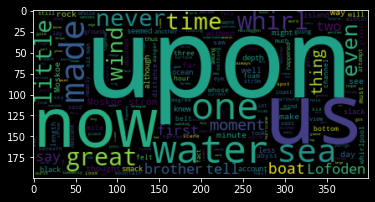

In [ ]:
# Word Clouds for the all classes 

print(X[0])
print(df['classification'][0])
plt.imshow(wordcloud0, interpolation='bilinear')
plt.show()

What chance, good lady, hath bereft you thus? —COMUS.    IT was a quiet and still afternoon when I strolled forth in the goodly city of Edina. The confusion and bustle in the streets were terrible. Men were talking. Women were screaming. Children were choking. Pigs were whistling. Carts they rattled. Bulls they bellowed. Cows they lowed. Horses they neighed. Cats they caterwauled. Dogs they danced. Danced! Could it then be possible? Danced! Alas, thought I, my dancing days are over! Thus it is ever. What a host of gloomy recollections will ever and anon be awakened in the mind of genius and imaginative contemplation, especially of a genius doomed to the everlasting and eternal, and continual, and, as one might say, the—continued—yes, the continued and continuous, bitter, harassing, disturbing, and, if I may be allowed the expression, the very disturbing influence of the serene, and godlike, and heavenly, and exalted, and elevated, and purifying effect of what may be rightly termed the 

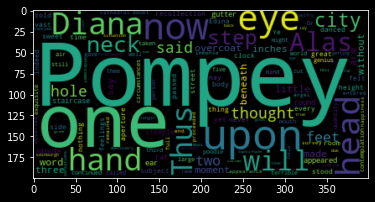

In [ ]:
# Word Clouds for the all classes 

print(X[1])
print(df['classification'][1])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()

Intensos rigidarn in frontern ascendere canos Passus erat—— —Lucan—De Catone ——a bristly bore.    “LET us hurry to the walls,” said Abel-Phittim to Buzi-Ben-Levi and Simeon the Pharisee, on the tenth day of the month Thammuz, in the year of the world three thousand nine hundred and forty-one—let us hasten to the ramparts adjoining the gate of Benjamin, which is in the city of David, and overlooking the camp of the uncircumcised; for it is the last hour of the fourth watch, being sunrise; and the idolaters, in fulfilment of the promise of Pompey, should be awaiting us with the lambs for the sacrifices.”     Simeon, Abel-Phittim, and Duzi-Ben-Levi were the Gizbarim, or sub-collectors of the offering, in the holy city of Jerusalem.     “Verily,” replied the Pharisee; “let us hasten: for this generosity in the heathen is unwonted; and fickle-mindedness has ever been an attribute of the worshippers of Baal.”     “‘That they are fickle-minded and treacherous is as true as the Pentateuch,” sa

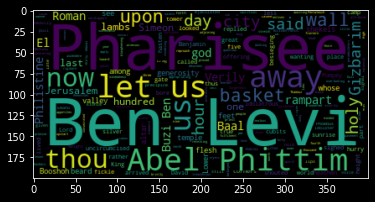

DURING the fall of the year 1827, while residing near Charlottesville, Virginia, I casually made the acquaintance of Mr. Augustus Bedloe. This young gentleman was remarkable in every respect, and excited in me a profound interest and curiosity. I found it impossible to comprehend him either in his moral or his physical relations. Of his family I could obtain no satisfactory account. Whence he came, I never ascertained. Even about his age—although I call him a young gentleman—there was something which perplexed me in no little degree. He certainly seemed young—and he made a point of speaking about his youth—yet there were moments when I should have had little trouble in imagining him a hundred years of age. But in no regard was he more peculiar than in his personal appearance. He was singularly tall and thin. He stooped much. His limbs were exceedingly long and emaciated. His forehead was broad and low. His complexion was absolutely bloodless. His mouth was large and flexible, and his t

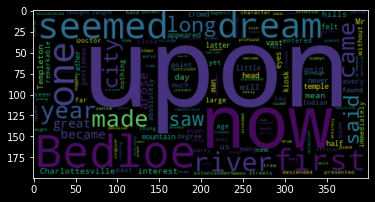

In [ ]:
# Word Clouds for the all classes 

print(X[2])
print(df['classification'][2])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()

print(X[3])
print(df['classification'][3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()

CONSIDERED AS ONE OF THE EXACT SCIENCES.    Hey, diddle diddle The cat and the fiddle    SINCE the world began there have been two Jeremys. The one wrote a Jeremiad about usury, and was called Jeremy Bentham. He has been much admired by Mr. John Neal, and was a great man in a small way. The other gave name to the most important of the Exact Sciences, and was a great man in a great way—I may say, indeed, in the very greatest of ways.     Diddling—or the abstract idea conveyed by the verb to diddle—is sufficiently well understood. Yet the fact, the deed, the thing diddling, is somewhat difficult to define. We may get, however, at a tolerably distinct conception of the matter in hand, by defining—not the thing, diddling, in itself—but man, as an animal that diddles. Had Plato but hit upon this, he would have been spared the affront of the picked chicken.     Very pertinently it was demanded of Plato, why a picked chicken, which was clearly “a biped without feathers,” was not, according to

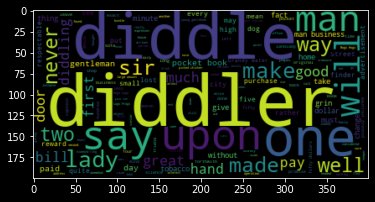

A Tale Containing an Allegory.  The gods do bear and will allow in kings The things which they abhor in rascal routes. Buckhurst’s Tragedy of Ferrex and Porrex.  ABOUT twelve o’clock, one night in the month of October, and during the chivalrous reign of the third Edward, two seamen belonging to the crew of the “Free and Easy,” a trading schooner plying between Sluys and the Thames, and then at anchor in that river, were much astonished to find themselves seated in the tap-room of an ale-house in the parish of St. Andrews, London—which ale-house bore for sign the portraiture of a “Jolly Tar.”   The room, although ill-contrived, smoke-blackened, low-pitched, and in every other respect agreeing with the general character of such places at the period—was, nevertheless, in the opinion of the grotesque groups scattered here and there within it, sufficiently well adapted to its purpose.   Of these groups our two seamen formed, I think, the most interesting, if not the most conspicuous.   The 

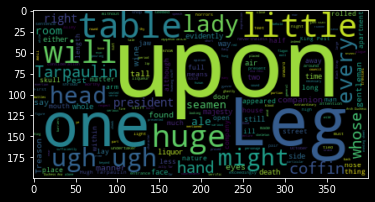

The garden like a lady fair was cut That lay as if she slumbered in delight, And to the open skies her eyes did shut; The azure fields of heaven were ‘sembled right In a large round set with flow’rs of light: The flowers de luce and the round sparks of dew That hung upon their azure leaves, did show Like twinkling stars that sparkle in the ev’ning blue. —GILES FLETCHER    NO MORE remarkable man ever lived than my friend, the young Ellison. He was remarkable in the entire and continuous profusion of good gifts ever lavished upon him by fortune. From his cradle to his grave, a gale of the blandest prosperity bore him along. Nor do I use the word Prosperity in its mere wordly or external sense. I mean it as synonymous with happiness. The person of whom I speak, seemed born for the purpose of foreshadowing the wild doctrines of Turgot, Price, Priestley, and Condorcet—of exemplifying, by individual instance, what has been deemed the mere chimera of the perfectionists. In the brief existence

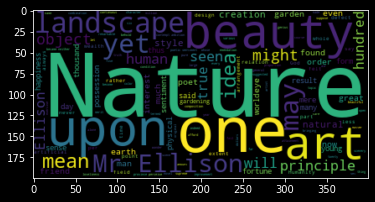

In [ ]:
# Word Clouds for the all classes 

print(X[5])
print(df['classification'][5])
plt.imshow(wordcloud5, interpolation='bilinear')
plt.show()

print(X[10])
print(df['classification'][10])
plt.imshow(wordcloud6, interpolation='bilinear')
plt.show()


print(X[40])
print(df['classification'][40])
plt.imshow(wordcloud7, interpolation='bilinear')
plt.show()

AS it is well known that the ‘wise men’ came ‘from the East,’ and as Mr. Touch-and-go Bullet-head came from the East, it follows that Mr. Bullet-head was a wise man; and if collateral proof of the matter be needed, here we have it—Mr. B. was an editor. Irascibility was his sole foible, for in fact the obstinacy of which men accused him was anything but his foible, since he justly considered it his forte. It was his strong point—his virtue; and it would have required all the logic of a Brownson to convince him that it was ‘anything else.’     I have shown that Touch-and-go Bullet-head was a wise man; and the only occasion on which he did not prove infallible, was when, abandoning that legitimate home for all wise men, the East, he migrated to the city of Alexander-the-Great-o-nopolis, or some place of a similar title, out West.     I must do him the justice to say, however, that when he made up his mind finally to settle in that town, it was under the impression that no newspaper, and c

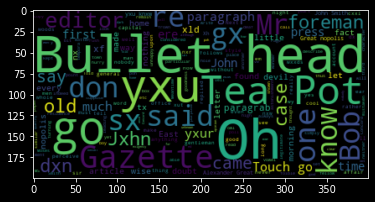

BY late accounts from Rotterdam, that city seems to be in a high state of philosophical excitement. Indeed, phenomena have there occurred of a nature so completely unexpected—so entirely novel—so utterly at variance with preconceived opinions—as to leave no doubt on my mind that long ere this all Europe is in an uproar, all physics in a ferment, all reason and astronomy together by the ears.   It appears that on the—— day of—— (I am not positive about the date), a vast crowd of people, for purposes not specifically mentioned, were assembled in the great square of the Exchange in the well-conditioned city of Rotterdam. The day was warm—unusually so for the season—there was hardly a breath of air stirring; and the multitude were in no bad humor at being now and then besprinkled with friendly showers of momentary duration, that fell from large white masses of cloud which chequered in a fitful manner the blue vault of the firmament. Nevertheless, about noon, a slight but remarkable agitati

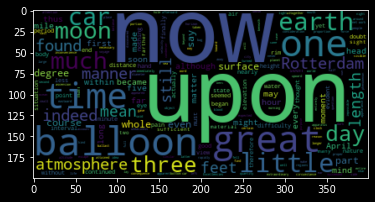

OINOS. Pardon, Agathos, the weakness of a spirit new-fledged with immortality!     AGATHOS. You have spoken nothing, my Oinos, for which pardon is to be demanded. Not even here is knowledge thing of intuition. For wisdom, ask of the angels freely, that it may be given!     OINOS. But in this existence, I dreamed that I should be at once cognizant of all things, and thus at once be happy in being cognizant of all.     AGATHOS. Ah, not in knowledge is happiness, but in the acquisition of knowledge! In for ever knowing, we are for ever blessed; but to know all were the curse of a fiend.     OINOS. But does not The Most High know all?     AGATHOS. That (since he is The Most Happy) must be still the one thing unknown even to Him.     OINOS. But, since we grow hourly in knowledge, must not at last all things be known?     AGATHOS. Look down into the abysmal distances!—attempt to force the gaze down the multitudinous vistas of the stars, as we sweep slowly through them thus—and thus—and thus!

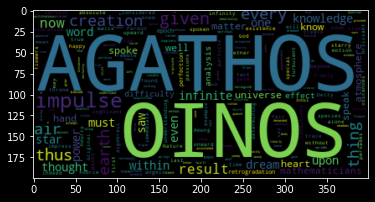

Pestis eram vivus—moriens tua mors ero. —Martin Luther    HORROR and fatality have been stalking abroad in all ages. Why then give a date to this story I have to tell? Let it suffice to say, that at the period of which I speak, there existed, in the interior of Hungary, a settled although hidden belief in the doctrines of the Metempsychosis. Of the doctrines themselves—that is, of their falsity, or of their probability—I say nothing. I assert, however, that much of our incredulity—as La Bruyère says of all our unhappiness—“vient de ne pouvoir être seuls.” {*1}     But there are some points in the Hungarian superstition which were fast verging to absurdity. They—the Hungarians—differed very essentially from their Eastern authorities. For example, “The soul,” said the former—I give the words of an acute and intelligent Parisian—“ne demeure qu’un seul fois dans un corps sensible: au reste—un cheval, un chien, un homme même, n’est que la ressemblance peu tangible de ces animaux.”     The f

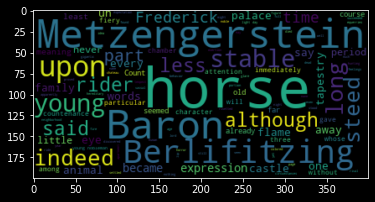

ALCMAN. The mountain pinnacles slumber; valleys, crags and caves are silent.    “LISTEN to me,” said the Demon as he placed his hand upon my head. “The region of which I speak is a dreary region in Libya, by the borders of the river Zaire. And there is no quiet there, nor silence.     “The waters of the river have a saffron and sickly hue; and they flow not onwards to the sea, but palpitate forever and forever beneath the red eye of the sun with a tumultuous and convulsive motion. For many miles on either side of the river’s oozy bed is a pale desert of gigantic water-lilies. They sigh one unto the other in that solitude, and stretch towards the heaven their long and ghastly necks, and nod to and fro their everlasting heads. And there is an indistinct murmur which cometh out from among them like the rushing of subterrene water. And they sigh one unto the other.     “But there is a boundary to their realm—the boundary of the dark, horrible, lofty forest. There, like the waves about the 

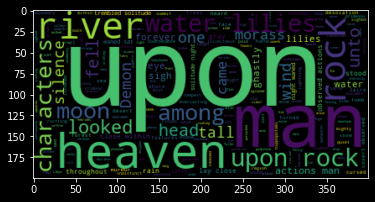

CONSIDERED AS ONE OF THE EXACT SCIENCES.    Hey, diddle diddle The cat and the fiddle    SINCE the world began there have been two Jeremys. The one wrote a Jeremiad about usury, and was called Jeremy Bentham. He has been much admired by Mr. John Neal, and was a great man in a small way. The other gave name to the most important of the Exact Sciences, and was a great man in a great way—I may say, indeed, in the very greatest of ways.     Diddling—or the abstract idea conveyed by the verb to diddle—is sufficiently well understood. Yet the fact, the deed, the thing diddling, is somewhat difficult to define. We may get, however, at a tolerably distinct conception of the matter in hand, by defining—not the thing, diddling, in itself—but man, as an animal that diddles. Had Plato but hit upon this, he would have been spared the affront of the picked chicken.     Very pertinently it was demanded of Plato, why a picked chicken, which was clearly “a biped without feathers,” was not, according to

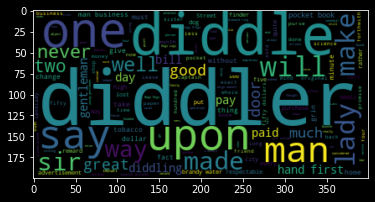

I will now play the Oedipus to the Rattleborough enigma. I will expound to you—as I alone can—the secret of the enginery that effected the Rattleborough miracle—the one, the true, the admitted, the undisputed, the indisputable miracle, which put a definite end to infidelity among the Rattleburghers and converted to the orthodoxy of the grandames all the carnal-minded who had ventured to be sceptical before.     This event—which I should be sorry to discuss in a tone of unsuitable levity—occurred in the summer of 18—. Mr. Barnabas Shuttleworthy—one of the wealthiest and most respectable citizens of the borough—had been missing for several days under circumstances which gave rise to suspicion of foul play. Mr. Shuttleworthy had set out from Rattleborough very early one Saturday morning, on horseback, with the avowed intention of proceeding to the city of-, about fifteen miles distant, and of returning the night of the same day. Two hours after his departure, however, his horse returned w

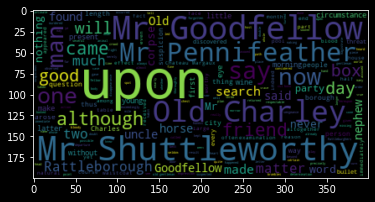

Nullus enim locus sine genio est.—Servius.    “LA MUSIQUE,” says Marmontel, in those “Contes Moraux” (*1) which in all our translations, we have insisted upon calling “Moral Tales,” as if in mockery of their spirit—“la musique est le seul des talents qui jouissent de lui-meme; tous les autres veulent des temoins.” He here confounds the pleasure derivable from sweet sounds with the capacity for creating them. No more than any other talent, is that for music susceptible of complete enjoyment, where there is no second party to appreciate its exercise. And it is only in common with other talents that it produces effects which may be fully enjoyed in solitude. The idea which the raconteur has either failed to entertain clearly, or has sacrificed in its expression to his national love of point, is, doubtless, the very tenable one that the higher order of music is the most thoroughly estimated when we are exclusively alone. The proposition, in this form, will be admitted at once by those who 

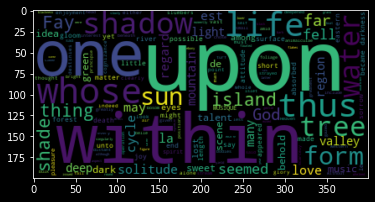

SOME years ago, I engaged passage from Charleston, S. C, to the city of New York, in the fine packet-ship “Independence,” Captain Hardy. We were to sail on the fifteenth of the month (June), weather permitting; and on the fourteenth, I went on board to arrange some matters in my state-room.     I found that we were to have a great many passengers, including a more than usual number of ladies. On the list were several of my acquaintances, and among other names, I was rejoiced to see that of Mr. Cornelius Wyatt, a young artist, for whom I entertained feelings of warm friendship. He had been with me a fellow-student at C— University, where we were very much together. He had the ordinary temperament of genius, and was a compound of misanthropy, sensibility, and enthusiasm. To these qualities he united the warmest and truest heart which ever beat in a human bosom.     I observed that his name was carded upon three state-rooms; and, upon again referring to the list of passengers, I found tha

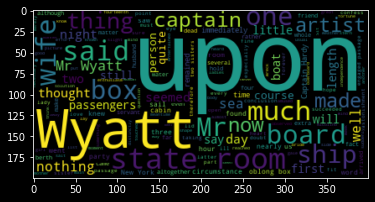

[Astounding News by Express, via Norfolk!—The Atlantic crossed in Three Days! Signal Triumph of Mr. Monck Mason’s Flying Machine!—Arrival at Sullivan’s Island, near Charlestown, S.C., of Mr. Mason, Mr. Robert Holland, Mr. Henson, Mr. Harrison Ainsworth, and four others, in the Steering Balloon, “Victoria,” after a passage of Seventy-five Hours from Land to Land! Full Particulars of the Voyage! The subjoined jeu d’esprit with the preceding heading in magnificent capitals, well interspersed with notes of admiration, was originally published, as matter of fact, in the “New York Sun,” a daily newspaper, and therein fully subserved the purpose of creating indigestible aliment for the quidnuncs during the few hours intervening between a couple of the Charleston mails. The rush for the “sole paper which had the news,” was something beyond even the prodigious; and, in fact, if (as some assert) the “Victoria” did not absolutely accomplish the voyage recorded, it will be difficult to assign a re

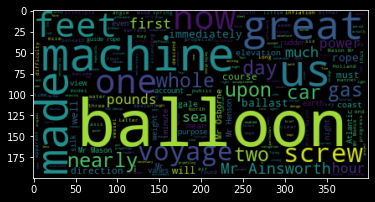

AFTER THE very minute and elaborate paper by Arago, to say nothing of the summary in ‘Silliman’s Journal,’ with the detailed statement just published by Lieutenant Maury, it will not be supposed, of course, that in offering a few hurried remarks in reference to Von Kempelen’s discovery, I have any design to look at the subject in a scientific point of view. My object is simply, in the first place, to say a few words of Von Kempelen himself (with whom, some years ago, I had the honor of a slight personal acquaintance), since every thing which concerns him must necessarily, at this moment, be of interest; and, in the second place, to look in a general way, and speculatively, at the results of the discovery.     It may be as well, however, to premise the cursory observations which I have to offer, by denying, very decidedly, what seems to be a general impression (gleaned, as usual in a case of this kind, from the newspapers), viz.: that this discovery, astounding as it unquestionably is, 

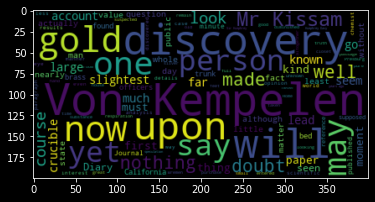

What song the Syrens sang, or what name Achilles assumed when he hid himself among women, although puzzling questions, are not beyond all conjecture. —Sir Thomas Browne.  The mental features discoursed of as the analytical, are, in themselves, but little susceptible of analysis. We appreciate them only in their effects. We know of them, among other things, that they are always to their possessor, when inordinately possessed, a source of the liveliest enjoyment. As the strong man exults in his physical ability, delighting in such exercises as call his muscles into action, so glories the analyst in that moral activity which disentangles. He derives pleasure from even the most trivial occupations bringing his talent into play. He is fond of enigmas, of conundrums, of hieroglyphics; exhibiting in his solutions of each a degree of acumen which appears to the ordinary apprehension pr?ternatural. His results, brought about by the very soul and essence of method, have, in truth, the whole air 

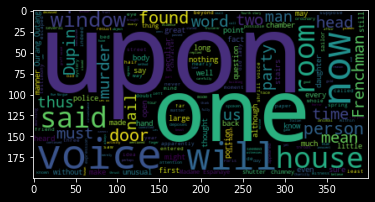

What song the Syrens sang, or what name Achilles assumed when he hid himself among women, although puzzling questions, are not beyond all conjecture. —Sir Thomas Browne.  The mental features discoursed of as the analytical, are, in themselves, but little susceptible of analysis. We appreciate them only in their effects. We know of them, among other things, that they are always to their possessor, when inordinately possessed, a source of the liveliest enjoyment. As the strong man exults in his physical ability, delighting in such exercises as call his muscles into action, so glories the analyst in that moral activity which disentangles. He derives pleasure from even the most trivial occupations bringing his talent into play. He is fond of enigmas, of conundrums, of hieroglyphics; exhibiting in his solutions of each a degree of acumen which appears to the ordinary apprehension pr?ternatural. His results, brought about by the very soul and essence of method, have, in truth, the whole air 

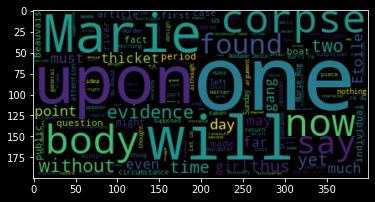

What song the Syrens sang, or what name Achilles assumed when he hid himself among women, although puzzling questions, are not beyond all conjecture. —Sir Thomas Browne.  The mental features discoursed of as the analytical, are, in themselves, but little susceptible of analysis. We appreciate them only in their effects. We know of them, among other things, that they are always to their possessor, when inordinately possessed, a source of the liveliest enjoyment. As the strong man exults in his physical ability, delighting in such exercises as call his muscles into action, so glories the analyst in that moral activity which disentangles. He derives pleasure from even the most trivial occupations bringing his talent into play. He is fond of enigmas, of conundrums, of hieroglyphics; exhibiting in his solutions of each a degree of acumen which appears to the ordinary apprehension pr?ternatural. His results, brought about by the very soul and essence of method, have, in truth, the whole air 

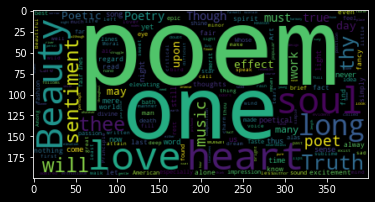

In [ ]:
# Word Clouds for the all classes 

print(X[69])
print(df['classification'][69])
plt.imshow(wordcloud8, interpolation='bilinear')
plt.show()

print(X[68])
print(df['classification'][68])
plt.imshow(wordcloud9, interpolation='bilinear')
plt.show()


print(X[49])
print(df['classification'][49])
plt.imshow(wordcloud10, interpolation='bilinear')
plt.show()

print(X[17])
print(df['classification'][17])
plt.imshow(wordcloud11, interpolation='bilinear')
plt.show()

print(X[23])
print(df['classification'][23])
plt.imshow(wordcloud12, interpolation='bilinear')
plt.show()


print(X[5])
print(df['classification'][5])
plt.imshow(wordcloud13, interpolation='bilinear')
plt.show()


print(X[57])
print(df['classification'][57])
plt.imshow(wordcloud14, interpolation='bilinear')
plt.show()


print(X[39])
print(df['classification'][39])
plt.imshow(wordcloud15, interpolation='bilinear')
plt.show()


print(X[46])
print(df['classification'][46])
plt.imshow(wordcloud16, interpolation='bilinear')
plt.show()


print(X[65])
print(df['classification'][65])
plt.imshow(wordcloud17, interpolation='bilinear')
plt.show()


print(X[59])
print(df['classification'][59])
plt.imshow(wordcloud18, interpolation='bilinear')
plt.show()


print(X[45])
print(df['classification'][45])
plt.imshow(wordcloud19, interpolation='bilinear')
plt.show()

print(X[45])
print(df['classification'][66])
plt.imshow(wordcloud20, interpolation='bilinear')
plt.show()

print(X[45])
print(df['classification'][67])
plt.imshow(wordcloud21, interpolation='bilinear')
plt.show()

## 2.Feature engineering

In [ ]:
# 80-20 splitting the dataset 
# 80% for training 
# 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1234)

In [ ]:
# displaying the training dataset (input features)
X_train.head()

50    THERE are certain themes of which the interest...
65    [Astounding News by Express, via Norfolk!—The ...
21    A Tale With a Moral.     “CON tal que las cost...
52    MANY years ago, it was the fashion to ridicule...
45    What song the Syrens sang, or what name Achill...
Name: text, dtype: object

In [ ]:
# displaying the testing dataset (input features)
X_test.head()

46    SOME years ago, I engaged passage from Charles...
57    I will now play the Oedipus to the Rattleborou...
33    The garden like a lady fair was cut, That lay ...
36    Son coeur est un luth suspendu; Sitôt qu’on le...
6     Sub conservatione formae specificae salva anim...
Name: text, dtype: object

In [ ]:
# defining the bag-of-words transformer on the text-processed corpus 
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7f161e5c9730>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# transforming into Bag-of-Words and hence textual data to numeric
#ONLY TRAINING DATA
text_bow_train=bow_transformer.transform(X_train)
text_bow_train

<56x21846 sparse matrix of type '<class 'numpy.int64'>'
	with 68173 stored elements in Compressed Sparse Row format>

In [ ]:
# transforming into Bag-of-Words and hence textual data to numeric
#TEST DATA
text_bow_test=bow_transformer.transform(X_test)
text_bow_test

<14x21846 sparse matrix of type '<class 'numpy.int64'>'
	with 14190 stored elements in Compressed Sparse Row format>

## 3.Model fitting

In [ ]:
# Decision tree Algorithm
clf = DecisionTreeClassifier(criterion = 'entropy')
# training the model
model = clf.fit(text_bow_train, y_train)

In [ ]:
# Displaying the training accuracy
model.score(text_bow_train, y_train)

1.0

In [ ]:
# Displaying the testing accuracy
model.score(text_bow_test, y_test)

0.21428571428571427

In [ ]:

# getting the predictions of the test data set
predictions = model.predict(text_bow_test)
# getting the Precision, Recall, F1-Score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
          11       0.33      0.17      0.22         6
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.50      0.50      0.50         2
          16       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          21       1.00      1.00      1.00         1

    accuracy                           0.21        14
   macro avg       0.15      0.14      0.14        14
weighted avg       0.29      0.21      0.24        14



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


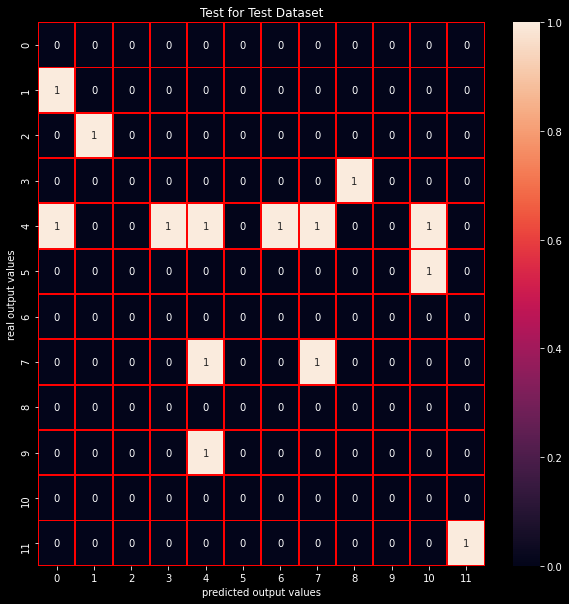

In [ ]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix   
cm = confusion_matrix(y_test,predictions)
f, ax = plt.subplots(figsize =(10,10))
sns.heatmap(cm,annot = True,linewidths=1.0,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted output values")
plt.ylabel("real output values")
plt.show()

# Assignment 3

## Predict power usage in the future

## Step 01: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
np.random.seed(0)
import sklearn.model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Step 02: Dataset Visualization

In [ ]:
# reads the dataset 1 and stores into the dataframe
df_power_usage = pd.read_csv('EhB Data Science Assignment Dataset 3_1.csv')

In [ ]:
# reads the dataset 2 and stores into the dataframe
df_temperature = pd.read_csv('EhB Data Science Assignment Dataset 3_2.csv')

In [ ]:
# Displaying the dataset of power 
df_power_usage.head()

StartDate  Value (kWh)  day_of_week    notes
0  2016-01-06 00:00:00        1.057            2  weekday
1  2016-01-06 01:00:00        1.171            2  weekday
2  2016-01-06 02:00:00        0.560            2  weekday
3  2016-01-06 03:00:00        0.828            2  weekday
4  2016-01-06 04:00:00        0.932            2  weekday

In [ ]:
# Displaying the dataset of temperature 
df_temperature.head()

Date  Day  Temp_max  ...  Press_min  Precipit  day_of_week
0  2016-01-06    1        85  ...       29.7      0.00            2
1  2016-02-06    2        76  ...       29.7      4.33            5
2  2016-03-06    3        79  ...       29.7      3.18            6
3  2016-04-06    4        76  ...       29.7      2.37            2
4  2016-05-06    5        82  ...       29.7      0.39            4

[5 rows x 19 columns]

In [ ]:
# checking and displaying the information about the power usage 
df_power_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StartDate    35952 non-null  object 
 1   Value (kWh)  35952 non-null  float64
 2   day_of_week  35952 non-null  int64  
 3   notes        35952 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
# checking and displaying the information about the temperature
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1552 non-null   object 
 1   Day          1552 non-null   int64  
 2   Temp_max     1552 non-null   int64  
 3   Temp_avg     1552 non-null   float64
 4   Temp_min     1552 non-null   int64  
 5   Dew_max      1552 non-null   int64  
 6   Dew_avg      1552 non-null   float64
 7   Dew_min      1552 non-null   int64  
 8   Hum_max      1552 non-null   int64  
 9   Hum_avg      1552 non-null   float64
 10  Hum_min      1552 non-null   int64  
 11  Wind_max     1552 non-null   int64  
 12  Wind_avg     1552 non-null   float64
 13  Wind_min     1552 non-null   int64  
 14  Press_max    1552 non-null   float64
 15  Press_avg    1552 non-null   float64
 16  Press_min    1552 non-null   float64
 17  Precipit     1552 non-null   float64
 18  day_of_week  1552 non-null   int64  
dtypes: flo

In [ ]:
# checking and displaying the statistics about the power usage 
df_power_usage.describe()

Value (kWh)   day_of_week
count  35952.000000  35952.000000
mean       0.891631      2.997330
std        0.908133      1.999024
min        0.064000      0.000000
25%        0.323750      1.000000
50%        0.501000      3.000000
75%        1.072000      5.000000
max        6.446000      6.000000

In [ ]:
# checking and display the statistics about the temperature
df_temperature.describe()

Day     Temp_max  ...     Precipit  day_of_week
count  1552.000000  1552.000000  ...  1552.000000  1552.000000
mean     15.726160    81.287371  ...     0.157893     2.996134
std       8.800483    12.723409  ...     0.658309     1.999029
min       1.000000    34.000000  ...     0.000000     0.000000
25%       8.000000    74.000000  ...     0.000000     1.000000
50%      16.000000    84.000000  ...     0.000000     3.000000
75%      23.000000    92.000000  ...     0.020000     5.000000
max      31.000000   101.000000  ...    13.430000     6.000000

[8 rows x 18 columns]

In [ ]:
# checking the missing values in power usage dataset
df_power_usage.isnull().sum()

StartDate      0
Value (kWh)    0
day_of_week    0
notes          0
dtype: int64

In [ ]:
# checking the missing values in the temperature dataset
df_temperature.isnull().sum()

Date           0
Day            0
Temp_max       0
Temp_avg       0
Temp_min       0
Dew_max        0
Dew_avg        0
Dew_min        0
Hum_max        0
Hum_avg        0
Hum_min        0
Wind_max       0
Wind_avg       0
Wind_min       0
Press_max      0
Press_avg      0
Press_min      0
Precipit       0
day_of_week    0
dtype: int64

In [ ]:
# updating the column start date in the dataset
df_power_usage['StartDate'] = pd.to_datetime(df_power_usage['StartDate'])

In [ ]:
# seperating the start date columns into year, months,week,day and hour
df_power_usage['year'] = df_power_usage['StartDate'].dt.year
df_power_usage['month'] = df_power_usage['StartDate'].dt.month
df_power_usage['week'] = df_power_usage['StartDate'].dt.week
df_power_usage['day'] = df_power_usage['StartDate'].dt.day
df_power_usage['hour'] = df_power_usage['StartDate'].dt.hour

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
# after i updated the date into new format i deleted the previous one
df_power_usage.drop('StartDate',axis=1,inplace=True)

In [ ]:
# seperating the input and output columns
X=df_power_usage.drop('notes',axis=1)
y=df_power_usage['notes']

## Displaying the final dataset

In [ ]:
# display the input features
print(X)

       Value (kWh)  day_of_week  year  month  week  day  hour
0            1.057            2  2016      1     1    6     0
1            1.171            2  2016      1     1    6     1
2            0.560            2  2016      1     1    6     2
3            0.828            2  2016      1     1    6     3
4            0.932            2  2016      1     1    6     4
...            ...          ...   ...    ...   ...  ...   ...
35947        1.307            1  2020      7    28    7    19
35948        2.872            1  2020      7    28    7    20
35949        2.138            1  2020      7    28    7    21
35950        2.199            1  2020      7    28    7    22
35951        1.809            1  2020      7    28    7    23

[35952 rows x 7 columns]


In [ ]:
# display the Output feature
print(y)

0        weekday
1        weekday
2        weekday
3        weekday
4        weekday
          ...   
35947    weekday
35948    weekday
35949    weekday
35950    weekday
35951    weekday
Name: notes, Length: 35952, dtype: object


## Label encoding 

In [ ]:
# Label encoding of output feature 

encoder = preprocessing.LabelEncoder()
y_true = pd.Series(encoder.fit_transform(y))

## Display the target value after label encoding

In [ ]:
print(y_true)

0        2
1        2
2        2
3        2
4        2
        ..
35947    2
35948    2
35949    2
35950    2
35951    2
Length: 35952, dtype: int64


## Check and count the examples against each output label

In [ ]:

counter = Counter(y_true)
for a,b in counter.items():
    per = b / len(y_true) * 100
    print('Class=%d, n=%d (%.3f%%)' % (a, b, per))

Class=2, n=23299 (64.806%)
Class=3, n=9215 (25.631%)
Class=1, n=1133 (3.151%)
Class=0, n=2305 (6.411%)


## Plot the graphs of each output label

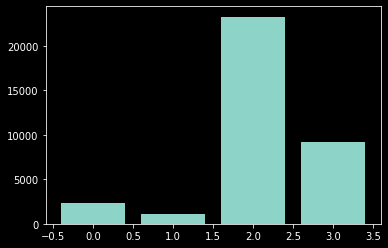

In [ ]:
plt.bar(counter.keys(), counter.values())
plt.style.use('dark_background')
plt.show()

## Splitting the data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.4, random_state=1,stratify=y)

### Displaying the training data

In [ ]:
X_train.head()

Value (kWh)  day_of_week  year  month  week  day  hour
31744        0.302            1  2020      1     3   14    16
34687        0.318            5  2020      5    20   16     7
32343        0.288            6  2020      8    31    2    15
18965        1.521            1  2018      7    31   31     5
355          3.822            2  2016      6    24   15    19

In [ ]:
y_train.head()

31744           weekday
34687    COVID_lockdown
32343           weekend
18965           weekday
355             weekday
Name: notes, dtype: object

### Display the Testing dataset

In [ ]:
X_test.head()

Value (kWh)  day_of_week  year  month  week  day  hour
19911        3.360            3  2018      8    32    9    15
29674        0.701            6  2019     10    42   20    10
1845         3.130            1  2016      8    33   16    21
2832         1.242            1  2016      9    39   27     0
23421        0.390            2  2019      1     1    2    21

In [ ]:
y_test.head()

19911    weekday
29674    weekend
1845     weekday
2832     weekday
23421    weekday
Name: notes, dtype: object

### Checking the class distribution on training set

In [ ]:
y_train.value_counts(normalize=True)

weekday           0.648046
weekend           0.256316
COVID_lockdown    0.064114
vacation          0.031524
Name: notes, dtype: float64

### Checking the class distribution on testing dataset

In [ ]:
y_test.value_counts(normalize=True)

weekday           0.648077
weekend           0.256310
COVID_lockdown    0.064112
vacation          0.031500
Name: notes, dtype: float64

### Label encoding of training and testing output feature

In [ ]:
# Initilize the enocder

encoder = preprocessing.LabelEncoder()

#encode the training data 

y_train = pd.Series(encoder.fit_transform(y_train))

In [ ]:

y_test = pd.Series(encoder.fit_transform(y_test))

## Training Phase

In [ ]:
# defined the Decision tree model 
# i used Decision tree algorithm because this algorithm works best 
# A time series is a series of data points indexed in time order. And  ID3 algorithm of decision tree can be used to construct a decision tree
model = RandomForestClassifier()

In [ ]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model_trained = model.fit(X_train, y_train)
print()

## Testing Phase

In [ ]:
y_pred_test = model_trained.predict(X_test)

### Check accuracy

In [ ]:
# The results show that the classification algorithm both is fast enough to operate in real time and performs well.
# The time series analysis shows that it is possible
accuracy_score(y_test, y_pred_test)

0.9995827828384675

## Displaying the confusion matrix

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[ 921,    0,    1,    0],
       [   0,  448,    3,    2],
       [   0,    0, 9320,    0],
       [   0,    0,    0, 3686]])

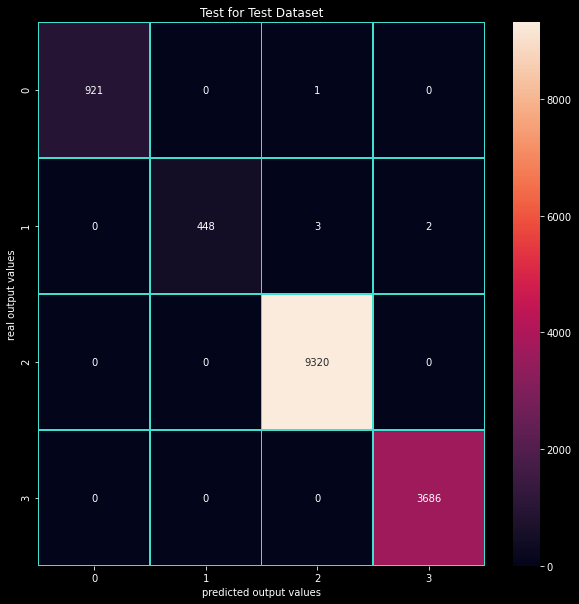

In [ ]:
from sklearn.metrics import confusion_matrix   
cm = confusion_matrix(y_test,y_pred_test)
f, ax = plt.subplots(figsize =(10,10))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="turquoise",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted output values")
plt.ylabel("real output values")
plt.show() 
